# **Trabajo Practico Final - Probabilidad Aplicada**
![Imagen](http://www.inspt.utn.edu.ar/images/aragna_.png)
### Profesora: ***Chan, Debora***
### Alumno: ***Mermoz, Daniel Alberto***

*En el presente cuaderno se realizara un analisis sobre la poblacion de alumnos de 1er año del Instituto Nacional Superior del Profesorado Tecnico (INSPT) correspondiente al 2018*

#### Carga de librerias

In [59]:
import numpy as np
import pandas as pd
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

## ------------------------------------------------

#### Carga la base de Datos 


In [60]:
df= pd.read_excel('Relevamiento Alumnos 2018.xlsx')
rows = len(df)
columns = df.columns.size
print('\nHay un total de ',rows,' datos en ',columns,' columnas cargados correctamente')


Hay un total de  105  datos en  20  columnas cargados correctamente


## ------------------------------------------------

#### A la hora de mostrar la dataframe se puede utilizar alguno de los siguientes codigos
<pre>
df:         para toda la DataFrame
dfhead(5):  para las primeras 5 filas
de.loc:     para seleccionar que filas y columnas quiero mostrar </pre>
##### (Por una cuestion de visualizacion se opto por esta ultima)


In [61]:
print("\nFiltrado parcial para mostrar la DataFrame")
df.loc[[0,1,2,3,4],["Comision","Edad","Genero","Promedio final del secundario","Lugar de residencia", "¿Trabajas actualmente?"]]


Filtrado parcial para mostrar la DataFrame


,Comision,Edad,Genero,Promedio final del secundario,Lugar de residencia,¿Trabajas actualmente?
0,1-604 TN,26,Femenino,7.81,CABA,Si
1,1-604 TN,28,Femenino,6.65,Provincia de Buenos Aires,Si
2,1-604 TN,39,Masculino,7.63,Provincia de Buenos Aires,Si
3,1-601 TM,36,Masculino,8.41,CABA,No
4,1-604 TT,23,Femenino,9.53,CABA,Si


## ------------------------------------------------

#### Mediante el comando `df.describe()` recibo algunos datos relevantes sobre la DataFrame
<pre>
#mean:      Media
#std:       Desviacion Estandar
#min:       Mínimo
#25,50,75   Percentil
#max:       Máximo
</pre>

In [62]:
df.describe()

,Edad,Altura,Promedio final del secundario,Año de egreso de la escuela secundaria
count,105.000000,105.000000,105.000000,105.000000
mean,26.742857,1.727524,8.066762,2009.019048
std,6.836031,0.123076,1.178618,6.076406
min,18.000000,1.510000,6.050000,1996.000000
25%,22.000000,1.640000,7.120000,2005.000000
50%,25.000000,1.740000,8.000000,2011.000000
75%,30.000000,1.790000,9.010000,2014.000000
max,64.000000,1.980000,9.950000,2017.000000


## ------------------------------------------------

#### Filtrado de DataFrame

La funcion `dropna` nos elimina los registros sin algun dato (una vez realizado en la DF actual, pasan a ser 92)</p>
Otra opcion es usar la funcion `fillna` la cual nos reemplaza los datos vacios en el registro con un dato especificado (en este caso reemplazo el N/A de la columna por un "no especificado")


In [63]:
df_filtrado = df.fillna({"¿Qué te motivó a inscribiste en esta carrera?": "No especificado"})
rowsfil = len(df_filtrado)
columnsfil = df_filtrado.columns.size
print('\nHay un total de ',rowsfil,' datos en ',columnsfil,' columnas en el dataframe filtrado')
df = df_filtrado


Hay un total de  105  datos en  20  columnas en el dataframe filtrado


## ------------------------------------------------

#### Analisis de cantidad de alumnos de promedio "alto"

In [64]:
df[df["Promedio final del secundario"]>=8].loc[[],["Comision","Edad","Genero","Promedio final del secundario","Lugar de residencia", "¿Trabajas actualmente?"]]

,Comision,Edad,Genero,Promedio final del secundario,Lugar de residencia,¿Trabajas actualmente?


## ------------------------------------------------

#### Se realizara un analisis de acuerdo al genero de los estudiantes
En el mismo se verá en un grafico de "torta" el porcentaje de alumnos de cada sexo sobre el total de 105 alumnos

In [65]:
cantM = len(df[df.Genero == 'Masculino'])
cantF = len(df[df.Genero == 'Femenino'])
porcM = round(cantM/rows*100,2)
porcF = round(cantF/rows*100,2)
print('Cantidad de Hombres: ',cantM,'\tPorcentaje: ',porcM)
print('Cantidad de Mujeres: ',cantF,'\tPorcentaje: ',porcF)

Cantidad de Hombres:  82 	Porcentaje:  78.1
Cantidad de Mujeres:  23 	Porcentaje:  21.9


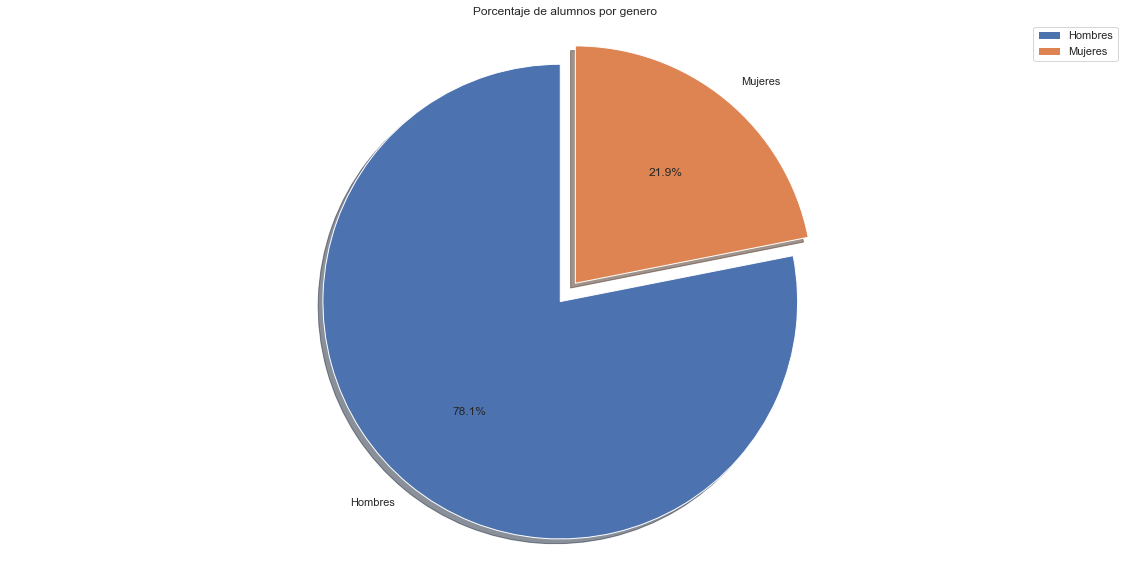

In [66]:

genero = 'Hombres', 'Mujeres'
#Declaramos el tamaño de cada 'rebanada' y en sumatoria todos deben dar al 100%
porcM = round(cantM/rows*100,2)
porcF = round(cantF/rows*100,2)
sizes = [porcM, porcF]
#En este punto señalamos que posicion debe 'resaltarse' y el valor, si se coloca 0, se omite
explode = (0.1, 0)  
 
fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
ax1.pie(sizes, explode=explode, labels=genero, autopct='%2.1f%%',
        shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Porcentaje de alumnos por genero")
plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

## ------------------------------------------------

#### Se analizara la altura de los estudiantes mediante un grafico de barras

Text(0.5, 1.0, 'Altura de los alumnos masculinos')

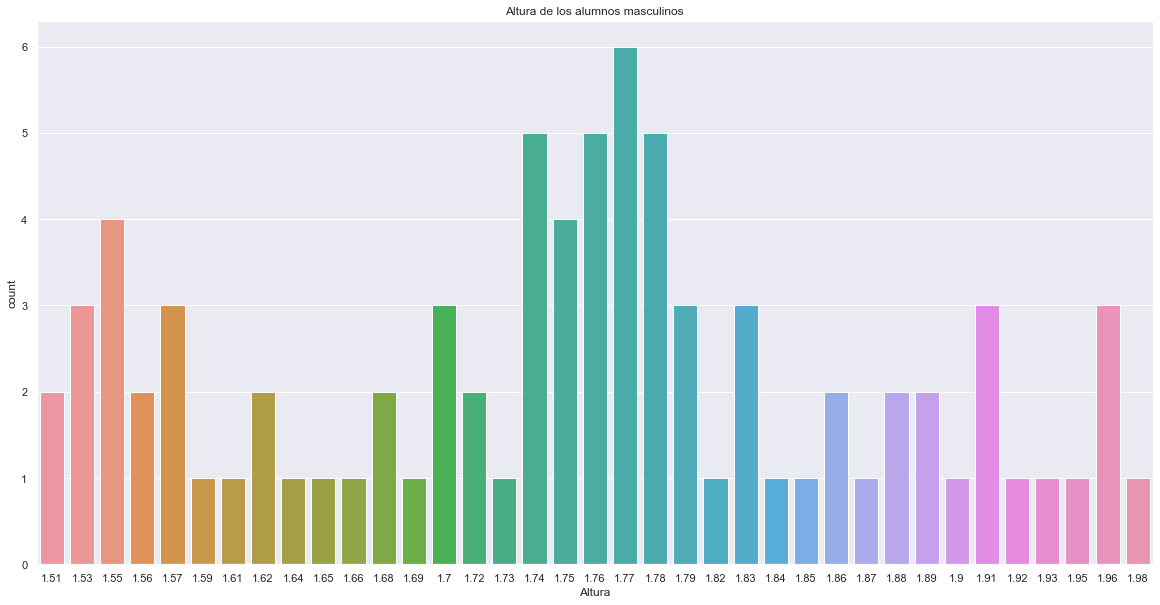

In [67]:
dfGH = df[["Genero","Altura"]]
dfGH = dfGH[dfGH["Genero"].str.contains("Masculino")]
Genero = dfGH.Genero
Altura = dfGH.Altura

sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=Altura)
plt.title("Altura de los alumnos masculinos")

Text(0.5, 1.0, 'Altura de los alumnas Femeninas')

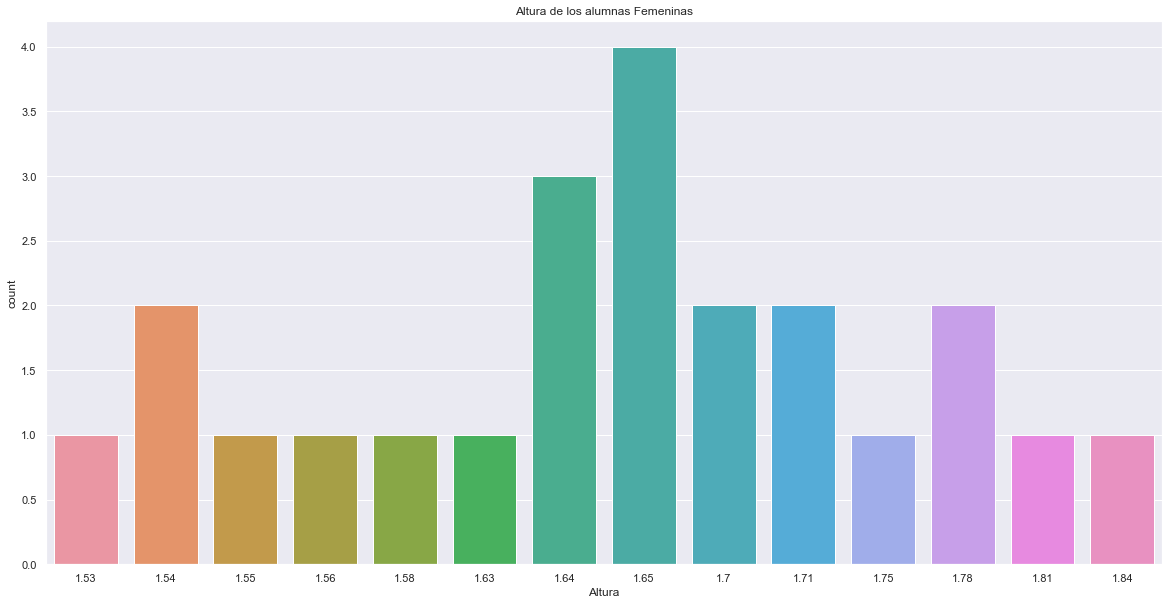

In [68]:
dfGH = df[["Genero","Altura"]]
dfGH = dfGH[dfGH["Genero"].str.contains("Femenino")]
Genero = dfGH.Genero
Altura = dfGH.Altura

sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=Altura)
plt.title("Altura de los alumnas Femeninas")